<a href="https://colab.research.google.com/github/Mai-Binh-Nam/Hand-on_DataAnalysisVEF/blob/master/%5BStudent%5D_Lecture_03_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import numpy as np
import pandas as pd
import geoplot as gplt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 100
import folium

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
customer = pd.read_csv("https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/olist_customers_dataset.csv.zip?raw=true", compression="zip")
geolocation = pd.read_csv("https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/olist_geolocation_dataset.csv.zip?raw=true", compression="zip")
order_items = pd.read_csv("https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/olist_order_items_dataset.csv.zip?raw=true", compression="zip")
order_payments = pd.read_csv("https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/olist_order_payments_dataset.csv.zip?raw=true", compression="zip")
order_reviews = pd.read_csv("https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/olist_order_reviews_dataset.csv.zip?raw=true", compression="zip")
orders = pd.read_csv("https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/olist_orders_dataset.csv.zip?raw=true", compression="zip")
products = pd.read_csv("https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/olist_products_dataset.csv.zip?raw=true", compression="zip")
sellers = pd.read_csv("https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/olist_sellers_dataset.csv.zip?raw=true", compression="zip")

# Explore order payments with missing values

In [ ]:
df = pd.read_csv('https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/order_payments_missing.csv?raw=true')

In [ ]:
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,fcb37577370584bc94c2b97a2e61433c,1,credit_card,3,133.63
1,db59e4d919b738f6f1b8b9b56345b567,1,boleto,1,116.94
2,b62f088b105938198ca85cfd28e93efb,1,credit_card,2,138.60
3,0c7ccdb239bd524a31dc66094fa59626,1,boleto,1,55.10
4,726050586b99cf152bd2d7ea5065b7dc,1,credit_card,4,50.96


In [ ]:
# Count NA
df = df.drop(columns=['order_id'])
pd.isnull(df).sum(axis=0)

payment_sequential         0
payment_type            1060
payment_installments       0
payment_value           2890
dtype: int64

## Fill NA by Mean/Mode

In [ ]:
# Fill NA by mean/mode
df['payment_type'] = df['payment_type'].fillna('mode')
df['payment_value'] = df['payment_value'].fillna('mean')

In [ ]:
df = pd.read_csv('https://github.com/pnhuy/datasets/blob/master/brazilian_ecommerce/data/order_payments_missing.csv?raw=true')
df = df.drop(columns=['order_id'])
df = pd.get_dummies(df)

## Fill NA by using model

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=50)
df_nona = imputer.fit_transform(df)

In [ ]:
df2 = pd.DataFrame(df_nona, columns=df.columns)

In [ ]:
pd.isnull(df2).sum(axis=0)

payment_sequential          0
payment_installments        0
payment_value               0
payment_type_boleto         0
payment_type_credit_card    0
payment_type_debit_card     0
payment_type_not_defined    0
payment_type_voucher        0
dtype: int64

# Customer table

In [ ]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customer.customer_city.value_counts()[0:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

In [ ]:
def top_k_customer_city(customer, k=10):
    sr = customer.customer_city
    top_k = sr.value_counts()[0:k]
    other_count = len(sr) - top_k.sum()
    sr_count = sr.value_counts()[0:k].append(pd.Series([other_count], index=['Other']))
    return sr_count

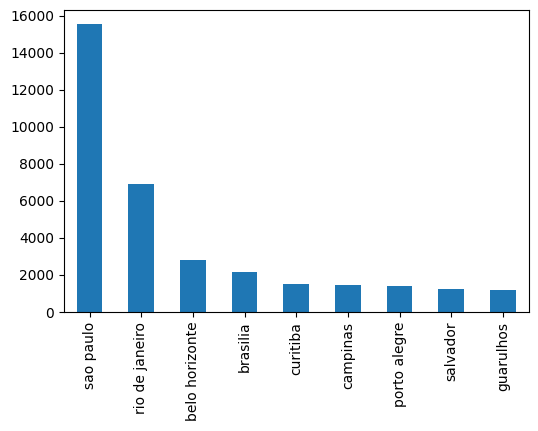

In [ ]:
top_k_customer_city(customer, 10)[0:-2].plot.bar()

# Order Items

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

## How many orders we have for each status?

In [ ]:
order_status_count = orders.order_status.value_counts()

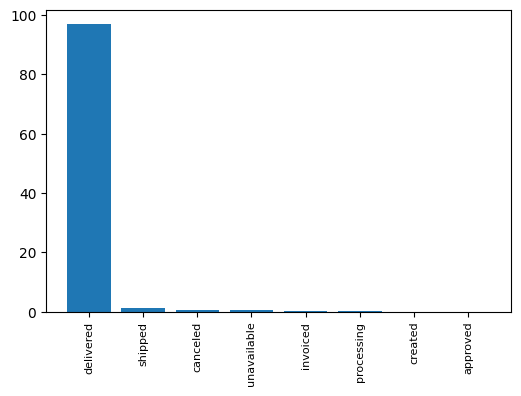

In [ ]:
fig, ax = plt.subplots()

# calculate percents
percents = [100*x/sum(order_status_count) for x in order_status_count]

x_ax = order_status_count.index
x_tick = np.arange(len(y_ax))

ax.bar(range(len(percents)), percents, align = "center", color = "tab:blue")
ax.set_xticks(x_tick)
ax.set_xticklabels(x_ax, size = 8, rotation='vertical')

plt.show()

 ## Is there any growing trend on brazilian e-commerce?

In [ ]:
orders['orders_month'] = orders.order_purchase_timestamp.dt.month
orders['orders_year'] = orders.order_purchase_timestamp.dt.year
orders['orders_year_month'] = orders['orders_year']*100 + orders['orders_month']

In [ ]:
orders_by_month = orders.groupby('orders_year_month')['order_id'].count()

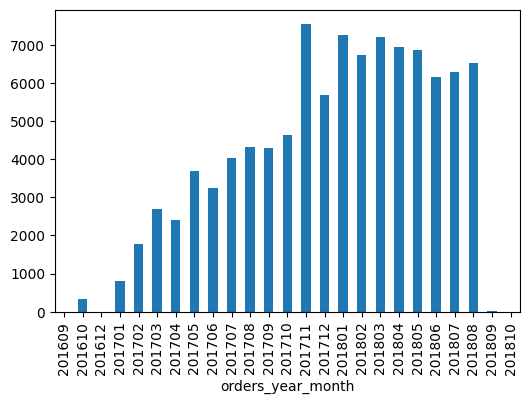

In [ ]:
orders_by_month.plot.bar()

## On what day of week brazilians customers tend to do online purchasing?

In [ ]:
orders['order_weekday'] = orders.order_purchase_timestamp.dt.weekday
orders_by_weekday = orders.groupby('order_weekday')['order_id'].count()
orders_by_weekday.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
orders_by_weekday

Monday       16196
Tuesday      15963
Wednesday    15552
Thursday     14761
Friday       14122
Saturday     10887
Sunday       11960
Name: order_id, dtype: int64

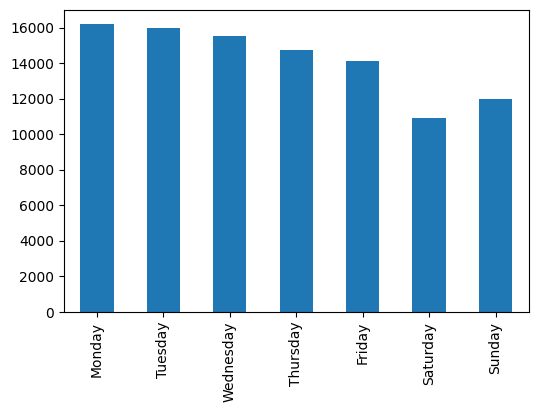

In [ ]:
orders_by_weekday.plot.bar()

## What time brazilians customers tend do buy (Dawn, Morning, Afternoon or Night)?

In [ ]:
def get_part_of_day(hour):
    return (
        1 if 5 <= hour <= 11
        else
        2 if 12 <= hour <= 17
        else
        3 if 18 <= hour <= 22
        else
        4
    )

part_order = ['Morning', 'Afternoon', 'Evening', 'Night']

In [ ]:
orders['order_hour'] = orders.order_purchase_timestamp.dt.hour
orders['day_part']= orders['order_hour'].apply(get_part_of_day)

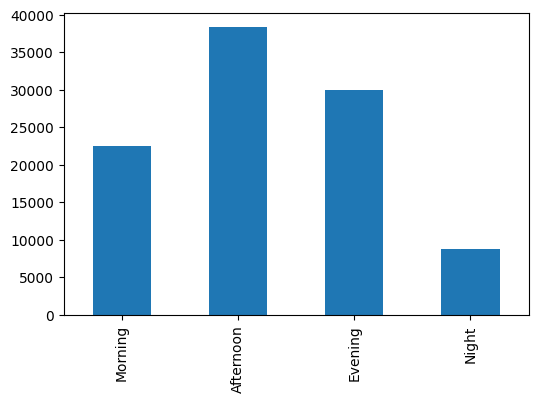

In [ ]:
part_count = orders['day_part'].value_counts().sort_index()
part_count.index = part_order
part_count.plot.bar()

## Comparison between 2017 and 2018

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,orders_year_month,order_weekday,order_time,order_hour,day_part,orders_month,orders_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,201710,0,10,10,1,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,7,201807,1,20,20,3,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8,201808,2,8,8,1,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,11,201711,5,19,19,3,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,201802,1,21,21,3,2,2018


In [ ]:
orders_by_year_month = orders.groupby(['orders_month', 'orders_year'])['order_id'].count().reset_index()

In [ ]:
df = orders_by_year_month[orders_by_year_month['orders_month'] < 8]

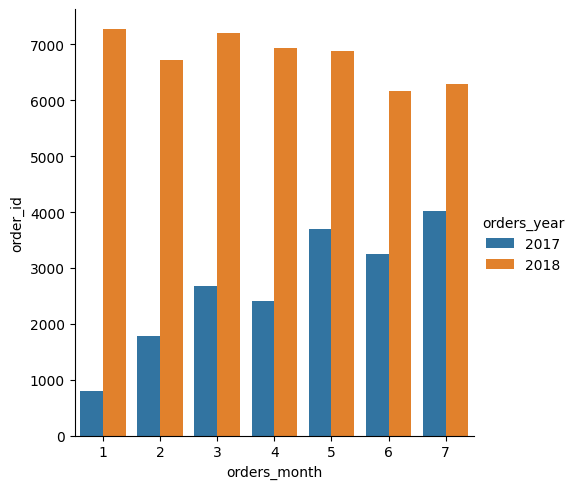

In [ ]:
g = sns.catplot(
    data = df, 
    kind='bar',
    x='orders_month',
    y='order_id',
    hue='orders_year'
)